# Mock Midterm Exam 01

- This is a closed book exam
- You should only ever have a SINGLE browser tab open
- The exam lasts 75 minutes, and Sakai will not accept late submissions
- You may use the following:

    - TAB completion
    - SHIFT-TAB completion for function arguments
    - help(func), `?func`, `func?` to get help on `func`
    
- To create a new cell, use `ESC-A` or `ESC-B`

## Duke Honor Code

By taking this exam, you agree to abide by the Duke Honor Code.

### All necessary imports have been made for you

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools as it
import pandas as pd
from string import punctuation
import re

In [2]:
import warnings

warnings.simplefilter('ignore', UserWarning)

**1**. (30 points)

- Write a function to find the root of a function using the Newton-Raphson algorithm. The Newton-Raphson algorithm does the following iteration until the absolute value change between $x_n$ and $x_{n+1}$ is below a certain tolerance:
$$
x_{n+1} = x_{n} - \frac{f(x_n)}{f'(x_n)}
$$
- The function should have the signature `newton_raphson(f, fprime, x, tol=1e-6)` 
- Use the function to find a root of $x^3 + 4x^2 - 1$, starting with $x = 1$ (20 points)
- Plot the function together with a horizontal line for $y=0$ and a red circle at the root. The x-limits of the plot should be 0 and 1. (10 points)

In [3]:
f = lambda x: x**3 +4*x**2 - 1
fprime = lambda x: 3*x**2 + 8*x
x = 1

In [4]:
def newton_raphson(f, fprime, x, tol=1e-6):
    """Find intersection of f and g."""
      
    xold = x
    eps = np.infty
    while eps > tol:
        x = xold - f(xold)/fprime(xold)
        eps = np.abs(x - xold)
        xold = x
    return x

In [5]:
root = newton_raphson(f, fprime, 1)

In [6]:
x = np.linspace(0, 1, 100)

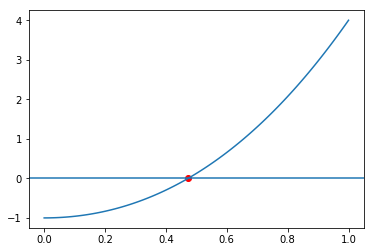

In [7]:
plt.plot(x, f(x))
plt.axhline(0)
plt.scatter([root], [0], c='red')
pass

**2**. (10 points)

- Assign to the variable `dna` the DNA sequence in the file `data/ecoli.fasta`, ignoring any lines that begin with the `>` character, and concatenate if necessary to have a single string with no whitespace or line breaks.

In [8]:
lines = []
with open('data/ecoli.fasta') as f:
    for line in f:
        if line.startswith('>'):
            continue
        else:
            lines.append(line.strip())
dna = ''.join(lines)

**3**. (10 points)

- How many of each nucleotide are there in `dna`?

In [9]:
nucs = set(dna)

In [10]:
for nuc in nucs:
    print(nuc, dna.count(nuc))

T 360
C 396
G 406
A 378


**4**. (20 points)

- Find the most common triplet in `dna` using a shifting window of length 3. Show all ties if there are any.

In [11]:
triplets = [''.join(ns) for ns in zip(dna, dna[1:], dna[2:])]
d = {}
for triplet in triplets:
    d[triplet] = d.get(triplet, 0) + 1

In [12]:
seq, top = max(d.items(), key=lambda x: x[1])
seq, top

('AAA', 48)

In [13]:
ties = [k for k, v in d.items() if v == top]
ties

['AAA']

**5**. (10 points)

Find the shortest motif that begins and ends with a `T` and contains 3 or more `A`s using a regular expression.

### Wrong soluiton posted initally

`findall` finds non-overlapping strings, so misses the correct subsequence.

In [14]:
pat = re.compile(r'T.*?A{3,}.*?T')

In [15]:
motifs = pat.findall(dna)

In [16]:
sorted(motifs, key=len)[0]

'TAAAAT'

### Corrected solution

In [17]:
motifs = []
i = 0
while True:
    m = pat.search(dna, pos=i)
    if not m: 
        break
    motifs.append(m.group())
    i = m.start() + 1

In [18]:
sorted(motifs, key=len)[0]

'TAAAT'

**6**. (10 points)

Using the provided `iris` data set, generate the figure shown here using `sns.factorplot` with `kind=swarm`.

![img](data/iris.png)

In [19]:
iris = sns.load_dataset('iris')

In [20]:
iris_tall = pd.melt(iris, id_vars=['species'])

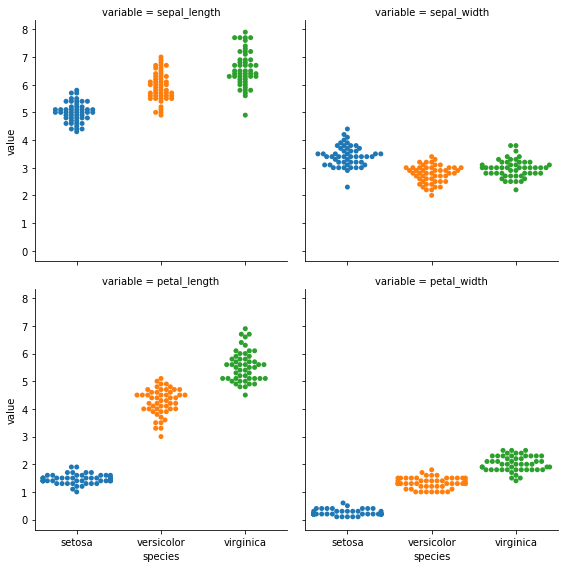

In [21]:
sns.factorplot(data=iris_tall, kind='swarm',
               x='species', y='value',
               col='variable', col_wrap=2)
pass

**7**. (10 points)

Scale the columns of the iris data frame so that each feature has mean 0 and standard deviation 1. Check that your scaled columns have zero mean and unit standard deviation.

In [22]:
mu = iris.apply('mean', axis=0)
sd = iris.apply('std', axis=0)
iris.iloc[:, :-1] = (iris.iloc[:, :-1] - mu)/(sd)

In [23]:
iris.mean(axis=0)

sepal_length   -5.684342e-16
sepal_width    -7.815970e-16
petal_length   -2.842171e-16
petal_width    -3.789561e-16
dtype: float64

In [24]:
iris.std(axis=0)

sepal_length    1.0
sepal_width     1.0
petal_length    1.0
petal_width     1.0
dtype: float64